In [5]:
# https://geoparse.readthedocs.io/en/latest/
import GEOparse
import pandas as pd

import pandas as pd
import numpy as np
import os
import json
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.decomposition import PCA

import requests

sys.path.append(os.getcwd())

# Also explicitly add the 'notebooks' folder if VS Code is running from root
if 'notebooks' not in os.getcwd():
     sys.path.append(os.path.join(os.getcwd(), 'notebooks'))

from microarray_analysis import *

# Pull Data

## Downloading and Loading Data

In [6]:
gse = GEOparse.get_GEO(filepath=r"D:\Workspace_PC\AIBI_Analytic_Tools\data\raw\GSE66360_family.soft.gz")

29-Jan-2026 03:51:03 INFO GEOparse - Parsing D:\Workspace_PC\AIBI_Analytic_Tools\data\raw\GSE66360_family.soft.gz: 
29-Jan-2026 03:51:03 DEBUG GEOparse - DATABASE: GeoMiame
29-Jan-2026 03:51:03 DEBUG GEOparse - SERIES: GSE66360
29-Jan-2026 03:51:03 DEBUG GEOparse - PLATFORM: GPL570
d:\Program\Conda\envs\mlwb\Lib\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620819
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620820
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620821
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620822
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620823
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620824
29-Jan-2026 03:51:04 DEBUG GEOparse - SAMPLE: GSM1620825
29-Jan-2026 03:51:05 DEBUG GEOparse - SAMPLE: GSM1620826
29-Jan-2026 03:51:05 DEBUG GEO

In [7]:
gse

<SERIES: GSE66360 - 99 SAMPLES, 1 d(s)>

# Info Data

In [8]:
control_sample = gse.phenotype_data[gse.phenotype_data['title'].str.contains('Control')]['geo_accession'].to_list()
treated_sample = gse.phenotype_data[~gse.phenotype_data['title'].str.contains('Control')]['geo_accession'].to_list()

In [9]:
control_sample = {i: 'control' for i in control_sample}
treated_sample = {i: 'treated' for i in treated_sample}

In [10]:
all_sample = control_sample | treated_sample
all_sample

{'GSM1620819': 'control',
 'GSM1620820': 'control',
 'GSM1620821': 'control',
 'GSM1620822': 'control',
 'GSM1620823': 'control',
 'GSM1620824': 'control',
 'GSM1620825': 'control',
 'GSM1620826': 'control',
 'GSM1620827': 'control',
 'GSM1620828': 'control',
 'GSM1620829': 'control',
 'GSM1620830': 'control',
 'GSM1620831': 'control',
 'GSM1620853': 'control',
 'GSM1620854': 'control',
 'GSM1620855': 'control',
 'GSM1620856': 'control',
 'GSM1620857': 'control',
 'GSM1620858': 'control',
 'GSM1620859': 'control',
 'GSM1620860': 'control',
 'GSM1620861': 'control',
 'GSM1620862': 'control',
 'GSM1620863': 'control',
 'GSM1620864': 'control',
 'GSM1620865': 'control',
 'GSM1620866': 'control',
 'GSM1620867': 'control',
 'GSM1620868': 'control',
 'GSM1620869': 'control',
 'GSM1620870': 'control',
 'GSM1620871': 'control',
 'GSM1620872': 'control',
 'GSM1620873': 'control',
 'GSM1620874': 'control',
 'GSM1620875': 'control',
 'GSM1620876': 'control',
 'GSM1620892': 'control',
 'GSM1620893

In [11]:
print()
print("GSM example:")
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print ("Table data:",)
    print (gsm.table.head())
    break

print()
print("GPL example:")
for gpl_name, gpl in gse.gpls.items():
    print("Name: ", gpl_name)
    print("Metadata:",)
    for key, value in gpl.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print("Table data:",)
    print(gpl.table.head())
    break


GSM example:
Name:  GSM1620819
Metadata:
 - title : Muse_1_DISCOVERY_Control
 - geo_accession : GSM1620819
 - status : Public on Feb 28 2015
 - submission_date : Feb 27 2015
 - last_update_date : Feb 28 2015
 - type : RNA
 - channel_count : 1
 - source_name_ch1 : CD146+ Circulating Endothelial Cells
 - organism_ch1 : Homo sapiens
 - taxid_ch1 : 9606
 - characteristics_ch1 : disease_status: Control, cohort: DISCOVERY, cell type: CD146+ Circulating Endothelial Cells
 - treatment_protocol_ch1 : The CellTracks®AutoPrep® system was used in conjunction with the CellSearch®CEC kit and the CellSearch®profile kit (Veridex) to immunomagnetically enrich and enumerate CD146+ CECs as previously described 12. The enriched CEC samples were analyzed with the CellTracks®Analyzer II and the number of CECs in the sample determined. For CEC microarray profiling, the AutoPrep tube with the sample from the CellTracks®AutoPrep® system was removed and placed into the MagCellect Magnet for 10-min incubation. 

In [12]:
gse.gpls['GPL570'].columns #.to_csv("")

,description
ID,"Affymetrix Probe Set ID LINK_PRE:""https://www...."
GB_ACC,"GenBank Accession Number LINK_PRE:""http://www...."
SPOT_ID,identifies controls
Species Scientific Name,The genus and species of the organism represen...
Annotation Date,The date that the annotations for this probe a...
Sequence Type,
Sequence Source,The database from which the sequence used to d...
Target Description,
Representative Public ID,The accession number of a representative seque...
Gene Title,Title of Gene represented by the probe set.


## SAMPLE

In [13]:
gse.gsms["GSM1620819"].columns

,description
ID_REF,
VALUE,RMA-normalized signal intensities


## List of sample

In [14]:
gsm_name = [gsm_name for gsm_name, gsm in gse.gsms.items()]
gsm_name

['GSM1620819',
 'GSM1620820',
 'GSM1620821',
 'GSM1620822',
 'GSM1620823',
 'GSM1620824',
 'GSM1620825',
 'GSM1620826',
 'GSM1620827',
 'GSM1620828',
 'GSM1620829',
 'GSM1620830',
 'GSM1620831',
 'GSM1620832',
 'GSM1620833',
 'GSM1620834',
 'GSM1620835',
 'GSM1620836',
 'GSM1620837',
 'GSM1620838',
 'GSM1620839',
 'GSM1620840',
 'GSM1620841',
 'GSM1620842',
 'GSM1620843',
 'GSM1620844',
 'GSM1620845',
 'GSM1620846',
 'GSM1620847',
 'GSM1620848',
 'GSM1620849',
 'GSM1620850',
 'GSM1620851',
 'GSM1620852',
 'GSM1620853',
 'GSM1620854',
 'GSM1620855',
 'GSM1620856',
 'GSM1620857',
 'GSM1620858',
 'GSM1620859',
 'GSM1620860',
 'GSM1620861',
 'GSM1620862',
 'GSM1620863',
 'GSM1620864',
 'GSM1620865',
 'GSM1620866',
 'GSM1620867',
 'GSM1620868',
 'GSM1620869',
 'GSM1620870',
 'GSM1620871',
 'GSM1620872',
 'GSM1620873',
 'GSM1620874',
 'GSM1620875',
 'GSM1620876',
 'GSM1620877',
 'GSM1620878',
 'GSM1620879',
 'GSM1620880',
 'GSM1620881',
 'GSM1620882',
 'GSM1620883',
 'GSM1620884',
 'GSM16208

# Prepare Data

- Data have normalized
- No missing, negative

## Merging Samples into a Single Matrix

In [15]:
pivoted_control_samples = gse.pivot_samples('VALUE')[gsm_name]
pivoted_control_samples.head()

name,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449


In [49]:
exprsdata = pivoted_control_samples.T
exprsdata

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,3.484544,9.743592,9.101642,9.305287,11.202425,11.640940,13.257325,13.266235,14.571230,14.276568
GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,4.100165,10.594091,10.016293,10.251773,11.937098,12.274504,13.593860,13.517013,14.738834,14.341233
GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,3.912831,10.215381,9.566554,9.704182,11.622232,11.929318,13.372759,13.416583,14.627181,14.318568
GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,3.536201,10.411684,9.742981,9.961545,11.655903,11.998559,13.490226,13.494827,14.754124,14.363296
GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,3.661028,10.059944,9.346365,9.461248,11.361435,11.787577,13.236785,13.330192,14.548389,14.263677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,5.375997,6.133232,...,7.522084,8.736252,6.471389,7.250409,6.885902,9.175110,6.601746,5.942308,7.290514,8.988511
GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,3.896807,...,4.117351,12.688717,12.554168,12.654375,13.194028,13.250813,14.271037,14.163706,14.884506,14.792506
GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,9.312494,5.545194,...,4.385172,11.323904,10.962008,11.243646,12.108575,12.235613,13.898616,13.682425,14.884506,14.783801


In [17]:
exprsdata.to_csv(r'D:\Workspace_PC\AIBI_Analytic_Tools\data\processed\expressed_data.csv')

In [50]:
exprsdata.dropna(axis = 1)

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,3.484544,9.743592,9.101642,9.305287,11.202425,11.640940,13.257325,13.266235,14.571230,14.276568
GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,4.100165,10.594091,10.016293,10.251773,11.937098,12.274504,13.593860,13.517013,14.738834,14.341233
GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,3.912831,10.215381,9.566554,9.704182,11.622232,11.929318,13.372759,13.416583,14.627181,14.318568
GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,3.536201,10.411684,9.742981,9.961545,11.655903,11.998559,13.490226,13.494827,14.754124,14.363296
GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,3.661028,10.059944,9.346365,9.461248,11.361435,11.787577,13.236785,13.330192,14.548389,14.263677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,5.375997,6.133232,...,7.522084,8.736252,6.471389,7.250409,6.885902,9.175110,6.601746,5.942308,7.290514,8.988511
GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,3.896807,...,4.117351,12.688717,12.554168,12.654375,13.194028,13.250813,14.271037,14.163706,14.884506,14.792506
GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,9.312494,5.545194,...,4.385172,11.323904,10.962008,11.243646,12.108575,12.235613,13.898616,13.682425,14.884506,14.783801


In [19]:
rank_mean = exprsdata.stack().groupby(exprsdata.rank(method='first').stack().astype(int)).mean()
exprsdata.rank(method='min').stack().astype(int).map(rank_mean).unstack()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM1620819,6.579346,7.302299,5.623604,5.681914,6.155905,6.698998,6.806352,6.022999,6.625638,6.962142,...,4.372480,5.137681,5.203901,5.263923,5.450623,5.709369,5.592683,5.709369,5.653334,5.623604
GSM1620820,5.050304,6.118637,6.137273,6.471376,5.592683,6.962142,6.099757,6.229009,6.022999,5.761213,...,6.410334,5.963154,5.963154,5.963154,6.333745,6.557032,6.246708,6.371222,5.942510,5.856389
GSM1620821,5.653334,6.450733,4.671190,6.557032,4.540676,6.430362,6.625638,5.761213,6.229009,7.487549,...,5.833837,5.653334,5.709369,5.735554,6.042474,6.061731,5.921583,6.080677,5.833837,5.810422
GSM1620822,5.489278,5.709369,5.203901,6.430362,5.786321,6.492286,7.419568,5.709369,6.778484,6.211066,...,4.876521,5.810422,5.856389,5.878604,6.061731,6.155905,6.137273,6.297995,5.983463,5.878604
GSM1620823,5.317098,6.557032,6.280949,4.876521,5.942510,7.201397,7.302299,5.623604,6.137273,6.835052,...,5.203901,5.489278,5.560194,5.450623,5.709369,5.878604,5.489278,5.900300,5.365222,5.450623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,7.419568,7.358467,5.856389,6.229009,8.181387,5.137681,5.560194,7.419568,4.101258,6.430362,...,8.928089,4.781126,4.963868,4.540676,4.781126,4.963868,4.540676,4.372480,4.671190,5.050304
GSM1620914,6.471376,5.592683,6.352250,7.249985,6.602292,5.489278,6.263960,7.033582,5.856389,4.540676,...,6.450733,7.649796,8.002316,7.748841,7.863195,7.748841,7.748841,7.649796,7.563556,7.419568
GSM1620915,6.390533,6.751288,7.033582,6.352250,6.751288,5.942510,7.487549,6.649290,5.709369,6.155905,...,6.928326,6.371222,6.430362,6.410334,6.492286,6.513617,6.778484,6.673845,7.563556,7.112874


In [51]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(exprsdata)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [52]:
samplesDf = pd.DataFrame.from_dict(all_sample, orient = 'index', columns = ['type'])
samplesDf.reset_index(inplace=True)

In [53]:
principalDf = pd.concat([samplesDf, principalDf], axis=1)
principalDf

,index,type,principal component 1,principal component 2,principal component 3
0,GSM1620819,control,116.365783,-26.554725,-34.673519
1,GSM1620820,control,35.039154,40.346269,-42.873221
2,GSM1620821,control,90.041434,-7.172564,-36.088317
3,GSM1620822,control,79.386289,-3.183354,-57.362806
4,GSM1620823,control,102.423670,-25.792863,-40.423244
...,...,...,...,...,...
94,GSM1620913,treated,-352.723374,-197.871187,0.114068
95,GSM1620914,treated,-145.667840,105.077494,34.076057
96,GSM1620915,treated,18.722504,17.084950,73.506185
97,GSM1620916,treated,87.589464,-11.481987,-2.954876


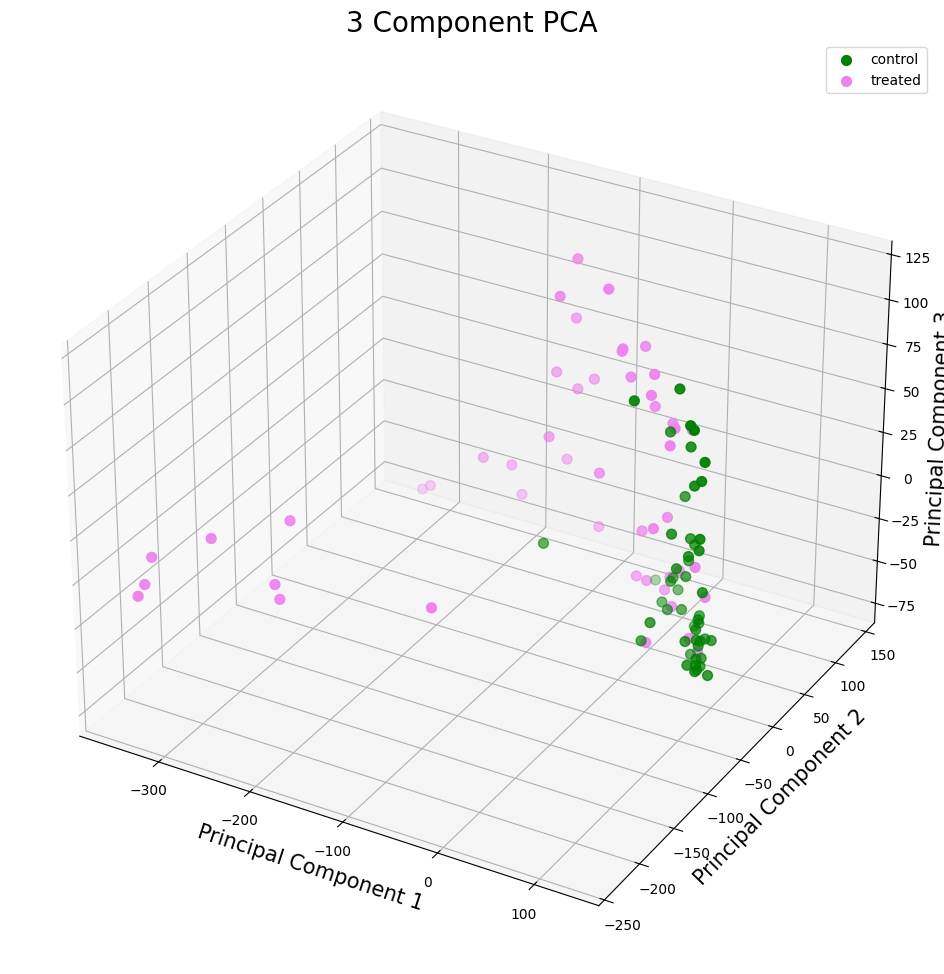

In [54]:
#PCA scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

types = ('control', 'treated')
colors = ['green', 'violet']
for type, color in zip(types, colors):
    indicesToKeep = principalDf['type'] == type
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], 
               principalDf.loc[indicesToKeep, 'principal component 2'], principalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.legend(types)

In [55]:
pca.explained_variance_ratio_

array([0.30002526, 0.10511087, 0.04540497])

In [56]:
exprsdata = exprsdata.T
exprsdata

name,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,11.640940,12.274504,11.929318,11.998559,11.787577,11.919596,12.021634,12.227910,11.995486,11.709799,...,12.337834,12.048352,13.309332,12.482698,6.421634,9.175110,13.250813,12.235613,11.901085,12.744633
AFFX-r2-Ec-bioD-3_at,13.257325,13.593860,13.372759,13.490226,13.236785,13.279990,13.374495,13.428778,13.290415,13.278438,...,13.863954,13.785841,14.289791,13.959234,7.794108,6.601746,14.271037,13.898616,13.847006,14.087965
AFFX-r2-Ec-bioD-5_at,13.266235,13.517013,13.416583,13.494827,13.330192,13.318979,13.472778,13.425372,13.346196,13.263749,...,13.677455,13.599466,14.170028,13.773684,7.706084,5.942308,14.163706,13.682425,13.551593,13.867425


In [57]:
variances = np.var(exprsdata, axis=1)
srt_idx = variances.argsort()[::-1]
data_sub = exprsdata.iloc[srt_idx].iloc[:800]
data_sub.index = data_sub.index.map(str)
data_sub

name,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
224590_at,11.612810,11.424275,11.574148,2.574408,2.407723,2.534124,11.283693,10.949366,11.337286,2.878738,...,2.580946,2.783982,2.601999,2.753538,9.470051,6.320568,2.415008,2.879097,2.466197,2.829062
214218_s_at,11.623787,11.660452,11.765248,2.496674,2.719469,2.638790,11.611052,11.463957,11.561197,3.675912,...,2.502031,2.763994,4.829134,2.851953,5.649870,7.252115,2.906768,3.948004,3.238227,3.756229
201744_s_at,2.424098,4.656258,2.326265,2.312743,2.159304,2.634833,2.395209,2.454241,2.469625,2.468983,...,5.629946,2.510537,3.255424,2.804070,7.383691,5.982647,3.476483,12.089065,11.779214,12.596988
221728_x_at,11.987100,12.098453,12.005834,3.104203,2.832713,3.411007,12.207947,11.869092,11.993915,3.771999,...,3.848140,3.373874,5.796081,3.507564,6.875824,3.509542,3.920312,4.005026,3.374694,3.804563
224588_at,11.519098,11.531088,11.649905,3.363342,3.636480,3.743541,11.402752,11.133963,11.898369,3.781906,...,3.439377,3.208556,5.153966,4.202666,6.797469,6.754956,6.577411,3.497528,3.453051,3.658222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558170_at,3.578682,5.367519,5.306930,5.097528,5.555369,4.590920,4.671381,6.730244,2.520651,4.331440,...,3.158964,4.808620,6.560020,3.800897,5.750186,7.614400,7.735970,2.765286,2.666500,7.583798
230207_s_at,7.971806,8.251805,5.278207,5.195885,7.033019,7.537025,7.706932,7.736796,6.853863,7.556872,...,9.271058,9.715889,5.302368,7.854542,6.897930,7.558124,10.647377,8.158112,8.410848,9.485028
237912_at,4.810280,6.113851,5.860629,4.984697,5.831306,4.772998,6.193797,5.265830,4.197593,5.513184,...,4.453178,5.854825,9.487144,4.158263,5.241256,4.624332,8.577617,8.342912,3.648122,7.029677


In [58]:
probeids = list(data_sub.index)
probeids

['224590_at',
 '214218_s_at',
 '201744_s_at',
 '221728_x_at',
 '224588_at',
 '227671_at',
 '201909_at',
 '206700_s_at',
 '228492_at',
 '205000_at',
 '231592_at',
 '1567913_at',
 '204409_s_at',
 '1562821_a_at',
 '232618_at',
 '204920_at',
 '238370_x_at',
 '223645_s_at',
 '234632_x_at',
 '1567912_s_at',
 '202620_s_at',
 '230746_s_at',
 '203083_at',
 '238375_at',
 '1556499_s_at',
 '203290_at',
 '240331_at',
 '213831_at',
 '210135_s_at',
 '235606_at',
 '205302_at',
 '1555756_a_at',
 '231598_x_at',
 '212190_at',
 '201579_at',
 '1563546_at',
 '205001_s_at',
 '234640_x_at',
 '211149_at',
 '204597_x_at',
 '223646_s_at',
 '1561543_at',
 '214131_at',
 '1559696_at',
 '230102_at',
 '223642_at',
 '204517_at',
 '1561856_at',
 '210809_s_at',
 '206157_at',
 '204653_at',
 '244723_at',
 '234407_s_at',
 '1552582_at',
 '1561703_at',
 '1562189_at',
 '1566863_at',
 '244480_at',
 '209774_x_at',
 '235446_at',
 '1554899_s_at',
 '209728_at',
 '1557762_at',
 '233606_at',
 '202729_s_at',
 '1564358_at',
 '226818_a

In [59]:
dict1 = {}
with open(r'D:\Workspace_PC\AIBI_Analytic_Tools\data\processed\probe2gene.txt') as f:
    for line in f:
        line = line.strip()
        (platform, probe, symbol) = line.split()
        dict1[probe] = symbol

In [60]:
len(set(probeids) - dict1.keys())

229

In [30]:
exprsdata = pd.DataFrame(exprsdata)
exprsdata['symbol'] = exprsdata.index.to_series().map(dict1)
exprsdata.reset_index(inplace=True)
data = exprsdata.set_index('symbol')
#Drop probe id column
data = data.drop('ID_REF', axis=1)
data

name,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
symbol,,,,,,,,,,,,,,,,,,,,,
DDR1,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
RFC2,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
HSPA6,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
PAX8,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
GUCA1A,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,11.640940,12.274504,11.929318,11.998559,11.787577,11.919596,12.021634,12.227910,11.995486,11.709799,...,12.337834,12.048352,13.309332,12.482698,6.421634,9.175110,13.250813,12.235613,11.901085,12.744633
NaN,13.257325,13.593860,13.372759,13.490226,13.236785,13.279990,13.374495,13.428778,13.290415,13.278438,...,13.863954,13.785841,14.289791,13.959234,7.794108,6.601746,14.271037,13.898616,13.847006,14.087965
NaN,13.266235,13.517013,13.416583,13.494827,13.330192,13.318979,13.472778,13.425372,13.346196,13.263749,...,13.677455,13.599466,14.170028,13.773684,7.706084,5.942308,14.163706,13.682425,13.551593,13.867425


In [61]:
data = data.reset_index().dropna().set_index('symbol')
data

name,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
symbol,,,,,,,,,,,,,,,,,,,,,
DDR1,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
RFC2,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
HSPA6,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
PAX8,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
GUCA1A,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAPDH,12.773296,12.512737,12.651562,12.275243,12.641337,12.499436,12.525973,12.477236,12.741366,12.737103,...,12.004772,12.687436,11.603509,12.255832,7.711252,8.505862,11.946791,12.609531,12.496210,12.051593
STAT1,11.061911,11.201648,10.922476,11.259617,11.069270,11.146125,11.418380,10.259303,10.683464,10.595544,...,13.120259,11.284865,9.877087,9.436892,5.678007,6.084504,10.474753,10.222336,11.332053,11.099024
STAT1,10.018112,9.991043,10.304140,10.424168,10.766734,10.550835,10.365576,9.731996,10.033879,10.205282,...,9.195556,9.398136,7.235130,9.210928,7.024097,4.792518,8.444779,8.947086,10.406056,9.516422


In [62]:
import warnings
from scipy.stats import chi2
from scipy.stats.mstats import zscore
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [63]:
data_cd = {}

sample_classes = {}
sample_class = np.zeros(data.shape[1], dtype=np.int32)
sample_class[samplesDf['type'].values == 'control'] = 1
sample_class[samplesDf['type'].values == 'treated'] = 2
sample_classes = sample_class

print(sample_classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [64]:
cd_res = chdir(data.values, sample_classes, data.index, gamma=.5, sort=False, calculate_sig=False)
cd_coefs = np.array(list(map(lambda x: x[0], cd_res)))

srt_idx = np.abs(cd_coefs).argsort()[::-1]
cd_coefs = cd_coefs[srt_idx][:600]
sorted_DEGs = data.index[srt_idx][:600]
up_genes = dict(zip(sorted_DEGs[cd_coefs > 0], cd_coefs[cd_coefs > 0]))
dn_genes = dict(zip(sorted_DEGs[cd_coefs < 0], cd_coefs[cd_coefs < 0]))
data_cd['up'] = up_genes
data_cd['dn'] = dn_genes

In [65]:
up_list = list(up_genes.keys())
dn_list = list(dn_genes.keys())

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Feature Selection ---
N_FEATURES = 200  # จำนวน Feature ที่ต้องการ (ตามโจทย์ < 500)

# เรียงลำดับความสำคัญจากผลลัพธ์ CD (cd_coefs)
srt_idx = np.abs(cd_coefs).argsort()[::-1]
top_gene_indices = srt_idx[:N_FEATURES]

# เก็บชื่อยีนไว้สำหรับแสดงผล (อาจมีชื่อซ้ำได้ ซึ่งเป็นปกติของ Microarray)
selected_genes_names = data.index[top_gene_indices]

print(f"Selected {len(selected_genes_names)} features based on Characteristic Direction.")

# --- 2. Data Preparation (จุดที่แก้ไข) ---
# ใช้ .iloc เพื่อเลือกแถวตาม 'ตำแหน่ง' ที่ถูกต้อง ทำให้ได้จำนวน Feature เท่ากับ N_FEATURES แน่นอน
X = data.iloc[top_gene_indices].T 

# แปลง Label: 1 (Control) -> 0, 2 (Treated) -> 1
y = np.where(sample_classes == 2, 1, 0)

# แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Selected 200 features based on Characteristic Direction.
Training shape: (69, 200)
Testing shape: (30, 200)


In [67]:
# --- 3. Define Models & Train ---
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

print("\n--- Model Evaluation Results ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "F1 Score": f1, "Model": model}
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# สรุปผล
res_df = pd.DataFrame(results).T[['Accuracy', 'F1 Score']]
print("\nSummary Table:")
print(res_df)


--- Model Evaluation Results ---

Model: Random Forest
Accuracy: 0.9000, F1 Score: 0.8966

Model: SVM
Accuracy: 0.7667, F1 Score: 0.7200

Model: Logistic Regression
Accuracy: 0.8333, F1 Score: 0.8148

Summary Table:
                     Accuracy  F1 Score
Random Forest             0.9  0.896552
SVM                  0.766667      0.72
Logistic Regression  0.833333  0.814815



Top 20 Important Genes:
          Gene  Importance
5         UBA7    0.090713
170      FRAS1    0.075359
53      GIMAP1    0.037998
112      WFDC9    0.034251
54      GIMAP1    0.033865
182     TMEM74    0.028719
142  LINC00161    0.026664
191     CLDN19    0.022350
139     MBD3L1    0.019825
7       PTPN21    0.019450
14      TTLL12    0.019019
163       TAF8    0.018744
33     AFG3L1P    0.017922
3         PAX8    0.017089
111      WFDC9    0.015738
115     TTLL10    0.015532
52      GIMAP1    0.015238
46      TTC39C    0.014598
34       CILP2    0.013539
30     SLC39A5    0.012624


C:\Users\surap\AppData\Local\Temp\ipykernel_20300\3632770459.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene', data=top_20_features, palette='viridis')


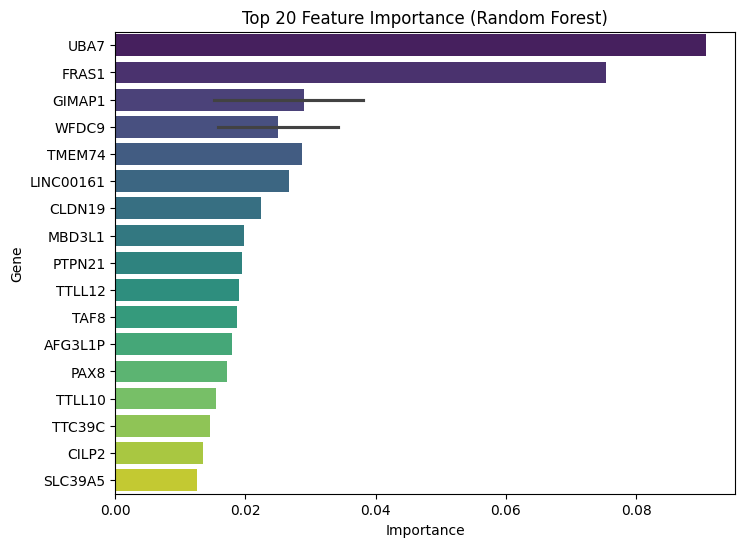

In [42]:
# --- 4. Feature Importance ---
rf_model = results["Random Forest"]["Model"]
importances = rf_model.feature_importances_

# ตอนนี้ความยาวของ selected_genes_names และ importances จะเท่ากันแล้ว (200 เท่ากัน)
feature_imp_df = pd.DataFrame({
    'Gene': selected_genes_names,
    'Importance': importances
})

# เรียงลำดับและเลือก Top 20
top_20_features = feature_imp_df.sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 Important Genes:")
print(top_20_features)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Gene', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.show()

--- Step 1: Limma-like DEGs Analysis ---
Found 24279 Significant DEGs


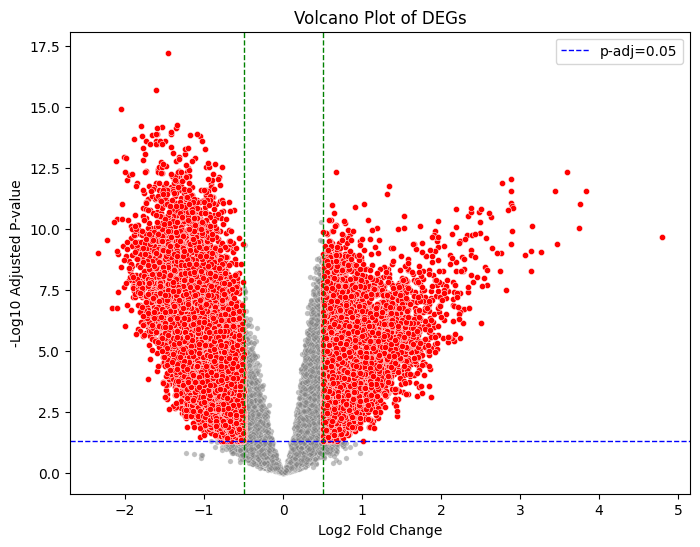


--- Step 2: WGCNA-style Module Detection ---
Detected duplicate genes. Aggregating by mean...
Using 3000 unique genes for clustering.
Identified 115 Gene Modules
Best Module has 155 genes (Corr with outcome: 0.661)


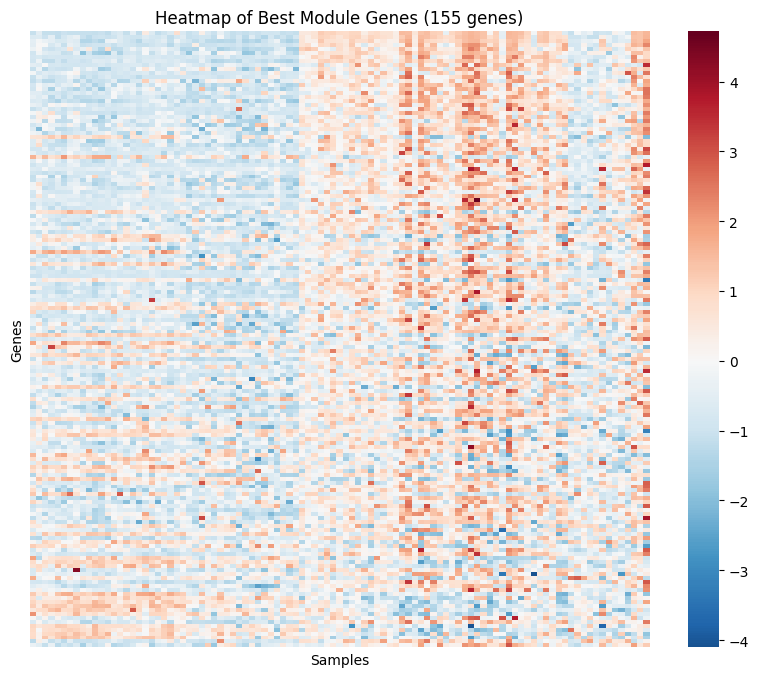


--- Step 3: Integrated Feature Selection (CD + DEGs + WGCNA + LASSO) ---
Total unique candidate genes for LASSO: 264
LASSO Input Shape: (99, 264)
LASSO selected 31 final features.
Top 10 Features: ['NANOG', 'ROBO1', 'TBC1D13', 'SH2D2A', 'ADAM32', 'COL15A1', 'NIT1', 'CAPN10', 'TCF25', 'TMSB15A']

--- Step 4: Model Training with K-Fold CV ---


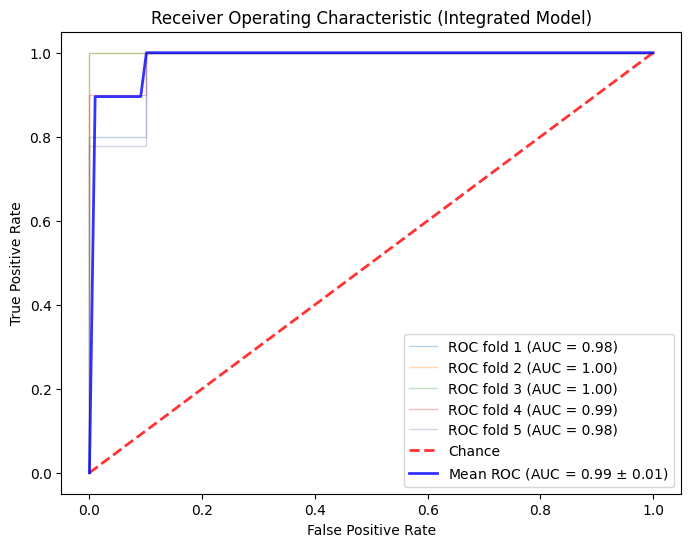


--- Final Classification Report (Cross-Validated) ---
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.85      0.94      0.89        49

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster import hierarchy
from statsmodels.stats.multitest import multipletests
from sklearn.linear_model import LogisticRegressionCV, LassoCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import squareform
# ==========================================
# 1. Limma-like Analysis (Differential Expression)
# ==========================================
print("--- Step 1: Limma-like DEGs Analysis ---")

# แยกกลุ่มข้อมูล
control_mask = (sample_classes == 1) # Control
treated_mask = (sample_classes == 2) # Treated (AMI)

# คำนวณ T-test สำหรับทุกยีน
p_values = []
log_fc = []

# ใช้ data.values เพื่อความเร็ว
X_val = data.values
for i in range(X_val.shape[0]):
    control_data = X_val[i, control_mask]
    treated_data = X_val[i, treated_mask]
    
    # T-test
    stat, p = stats.ttest_ind(treated_data, control_data, equal_var=False)
    p_values.append(p)
    
    # Log Fold Change (สมมติข้อมูลเป็น log2 scale แล้ว)
    fc = np.mean(treated_data) - np.mean(control_data)
    log_fc.append(fc)

# FDR Correction (Benjamini-Hochberg)
reject, pvals_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# สร้าง DataFrame สรุปผล
degs_df = pd.DataFrame({
    'Gene': data.index,
    'logFC': log_fc,
    'P_Value': p_values,
    'Adj_P_Value': pvals_corrected
}).set_index('Gene')

# คัดเลือก Significant DEGs (P-adj < 0.05 & |logFC| > 0.5)
sig_degs = degs_df[(degs_df['Adj_P_Value'] < 0.05) & (abs(degs_df['logFC']) > 0.5)]
print(f"Found {len(sig_degs)} Significant DEGs")

# --- Plot 1: Volcano Plot (Like Paper) ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=degs_df, x='logFC', y=-np.log10(degs_df['Adj_P_Value']), color='grey', alpha=0.5, s=15)
sns.scatterplot(data=sig_degs, x='logFC', y=-np.log10(sig_degs['Adj_P_Value']), color='red', s=20)
plt.axhline(-np.log10(0.05), color='blue', linestyle='--', linewidth=1, label='p-adj=0.05')
plt.axvline(0.5, color='green', linestyle='--', linewidth=1)
plt.axvline(-0.5, color='green', linestyle='--', linewidth=1)
plt.title('Volcano Plot of DEGs')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.legend()
plt.show()

# ==========================================
# 2. WGCNA-style Analysis (Correlation Modules) [FIXED HEATMAP]
# ==========================================
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

print("\n--- Step 2: WGCNA-style Module Detection ---")

# --- FIX 1: จัดการยีนซ้ำ (Mean Aggregation) ---
if data.index.duplicated().any():
    print(f"Detected duplicate genes. Aggregating by mean...")
    data_unique = data.groupby(data.index).mean()
else:
    data_unique = data.copy()

# เลือกยีนที่มีความแปรปรวนสูง (Top 3000)
var_genes = data_unique.var(axis=1).sort_values(ascending=False).head(3000).index
wgcna_data = data_unique.loc[var_genes].T # (Samples x Genes)

print(f"Using {len(var_genes)} unique genes for clustering.")

# คำนวณ Correlation Matrix
corr_matrix = wgcna_data.corr(method='pearson')

# Hierarchical Clustering
dist_matrix = 1 - abs(corr_matrix)
dist_matrix[dist_matrix < 0] = 0 # Clean floating point errors

# ใช้ squareform
linkage_matrix = hierarchy.linkage(squareform(dist_matrix, checks=False), method='average')

# ตัด Tree เพื่อหา Modules
clusters = hierarchy.fcluster(linkage_matrix, t=0.7, criterion='distance')
module_df = pd.DataFrame({'Gene': var_genes, 'Module': clusters})

print(f"Identified {len(np.unique(clusters))} Gene Modules")

# เลือก Module ที่สัมพันธ์กับ Outcome มากที่สุด
best_module_genes = []
best_corr = 0
y_num = np.where(sample_classes == 2, 1, 0)

for mod_id in np.unique(clusters):
    genes_in_mod = module_df[module_df['Module'] == mod_id]['Gene']
    if len(genes_in_mod) < 5: continue 
    
    # คำนวณ Eigengene
    mod_data = wgcna_data[genes_in_mod]
    pca = StandardScaler().fit_transform(mod_data)
    eigengene = np.mean(pca, axis=1) 
    
    corr, _ = stats.pearsonr(eigengene, y_num)
    if abs(corr) > abs(best_corr):
        best_corr = corr
        best_module_genes = genes_in_mod.tolist()

print(f"Best Module has {len(best_module_genes)} genes (Corr with outcome: {best_corr:.3f})")

# --- Plot 2: Cluster Map (แก้ไขส่วนที่ Error) ---
if len(best_module_genes) > 0:
    subset_data = data_unique.loc[best_module_genes]
    
    # --- FIX 2: ใช้ .sub และ .div แทน [:, None] เพื่อเลี่ยง ValueError ---
    subset_norm = subset_data.sub(subset_data.mean(axis=1), axis=0).div(subset_data.std(axis=1), axis=0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(subset_norm, cmap='RdBu_r', center=0, xticklabels=False, yticklabels=False)
    plt.title(f'Heatmap of Best Module Genes ({len(best_module_genes)} genes)')
    plt.xlabel('Samples')
    plt.ylabel('Genes')
    plt.show()
else:
    print("No significant module found.")

# ==========================================
# 3. Integrated Feature Selection & LASSO [FIXED]
# ==========================================
print("\n--- Step 3: Integrated Feature Selection (CD + DEGs + WGCNA + LASSO) ---")

# --- FIX: สร้าง data_unique อีกครั้ง (เผื่อข้าม Step 2 มา) ---
if 'data_unique' not in locals():
    print("Aggregating duplicate genes...")
    data_unique = data.groupby(data.index).mean()

# รวมยีนจากทุกวิธี
# 1. จาก CD (สมมติเอา Top 100)
try:
    if 'cd_coefs' in locals():
        srt_idx = np.abs(cd_coefs).argsort()[::-1]
        # ต้องกรองเฉพาะชื่อที่มีใน data_unique
        all_cd_genes = data.index[srt_idx]
        cd_genes = [g for g in all_cd_genes if g in data_unique.index][:100]
    else:
        cd_genes = []
except:
    cd_genes = []

# 2. จาก DEGs (Top 100)
degs_top = [g for g in degs_df.sort_values('Adj_P_Value').head(100).index.tolist() if g in data_unique.index]

# 3. จาก WGCNA (Best Module)
wgcna_genes = [g for g in best_module_genes[:100] if g in data_unique.index]

# Union ยีนทั้งหมด
candidate_genes = list(set(cd_genes + degs_top + wgcna_genes))
print(f"Total unique candidate genes for LASSO: {len(candidate_genes)}")

# --- FIX: ใช้ data_unique แทน data เพื่อป้องกันข้อมูลเบิ้ล ---
X_lasso = data_unique.loc[candidate_genes].T
y_lasso = np.where(sample_classes == 2, 1, 0) # Ensure y matches X samples

print(f"LASSO Input Shape: {X_lasso.shape}") # ควรเป็น (n_samples, n_candidates)

# LASSO with CV
# เพิ่ม max_iter เพื่อให้ model converge ง่ายขึ้น
lasso = LassoCV(cv=5, random_state=42, max_iter=50000).fit(X_lasso, y_lasso)

# ตอนนี้ length จะเท่ากันแน่นอน (เพราะใช้ data_unique)
lasso_coef = pd.Series(lasso.coef_, index=candidate_genes)
selected_features = lasso_coef[lasso_coef != 0].index.tolist()

print(f"LASSO selected {len(selected_features)} final features.")
print("Top 10 Features:", selected_features[:10])

# ==========================================
# 4. Advanced Modeling (K-Fold & Ensemble) [UPDATED]
# ==========================================
print("\n--- Step 4: Model Training with K-Fold CV ---")

if len(selected_features) == 0:
    print("WARNING: LASSO selected 0 features. Using top 20 candidates instead.")
    selected_features = candidate_genes[:20]

# ใช้ data_unique เสมอ
X_final = data_unique.loc[selected_features].T
y_final = y_lasso

# กำหนดโมเดล
clf1 = RandomForestClassifier(n_estimators=200, random_state=42)
clf2 = SVC(probability=True, kernel='linear', random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)

# Ensemble Voting
eclf = VotingClassifier(estimators=[
    ('rf', clf1), ('svm', clf2), ('gb', clf3)
], voting='soft')

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

i = 0
for train, test in cv.split(X_final, y_final):
    # Train
    model = eclf.fit(X_final.iloc[train], y_final[train])
    
    # Predict Proba
    probas_ = model.predict_proba(X_final.iloc[test])
    
    # ROC
    fpr, tpr, thresholds = roc_curve(y_final[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    i += 1

# Plot Mean ROC
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Integrated Model)')
plt.legend(loc="lower right")
plt.show()

# Final Evaluation
y_pred_cv = cross_val_predict(eclf, X_final, y_final, cv=5)
print("\n--- Final Classification Report (Cross-Validated) ---")
print(classification_report(y_final, y_pred_cv))

In [69]:
# รายชื่อยีนที่คุณต้องการตรวจสอบ (Target Genes)
target_genes = ['LILRA1', 'CCL20', 'IL1R2', 'TYROBP', 'CXCL16', 'NFKBIA']

print("--- Gene Presence Check ---")

# 1. เช็คว่าอยู่ใน Features สุดท้ายที่เข้าโมเดลหรือไม่ (selected_features)
found_in_final = [g for g in target_genes if g in selected_features]
missing_in_final = [g for g in target_genes if g not in selected_features]

print(f"\n[1] Found in Final Model ({len(found_in_final)}/{len(target_genes)}):")
print(found_in_final)

if len(missing_in_final) > 0:
    print(f"\nMissing from Final Model: {missing_in_final}")
    
    # 2. ถ้าไม่เจอในโมเดลสุดท้าย ลองเช็คว่ามันเคยเป็น Candidate หรือไม่ (ก่อนเข้า LASSO)
    # (candidate_genes คือรวมมิตรจาก CD + DEGs + WGCNA)
    found_in_candidates = [g for g in missing_in_final if g in candidate_genes]
    print(f"   -> But found in Candidate List (before LASSO): {found_in_candidates}")
    
    # 3. ถ้าไม่เคยเป็น Candidate เลย ลองเช็คว่ามีอยู่ในข้อมูลดิบ (data) หรือไม่
    # (อาจจะโดนคัดออกตั้งแต่แรกเพราะ P-value ไม่ดี หรือ Variance ต่ำ)
    not_in_candidates = [g for g in missing_in_final if g not in candidate_genes]
    found_in_raw = [g for g in not_in_candidates if g in data.index]
    print(f"   -> Exist in Raw Data but filtered out early: {found_in_raw}")
    
    # 4. ถ้าไม่มีใน Raw Data เลย
    not_in_raw = [g for g in not_in_candidates if g not in data.index]
    if len(not_in_raw) > 0:
        print(f"   -> Not found in dataset at all (Check spelling): {not_in_raw}")

# --- Optional: ดูค่าความสำคัญ (ถ้ามันอยู่ในโมเดล) ---
if len(found_in_final) > 0:
    print("\n--- Importance in LASSO Model ---")
    for gene in found_in_final:
        coef = lasso_coef.loc[gene]
        print(f"{gene}: Coefficient = {coef:.4f}")

--- Gene Presence Check ---

[1] Found in Final Model (0/6):
[]

Missing from Final Model: ['LILRA1', 'CCL20', 'IL1R2', 'TYROBP', 'CXCL16', 'NFKBIA']
   -> But found in Candidate List (before LASSO): []
   -> Exist in Raw Data but filtered out early: ['LILRA1', 'CCL20', 'IL1R2', 'TYROBP', 'CXCL16', 'NFKBIA']


In [71]:
# ==========================================
# DIAGNOSIS & RESCUE: Why were they dropped? [FIXED]
# ==========================================
import pandas as pd # Make sure pandas is imported

target_genes = ['LILRA1', 'CCL20', 'IL1R2', 'TYROBP', 'CXCL16', 'NFKBIA']

print("\n--- 1. Diagnosis: Checking Stats for Missing Genes ---")

# ตรวจสอบค่าสถิติ (พร้อมแก้ปัญหา Series format error)
for gene in target_genes:
    if gene in degs_df.index:
        # ดึงค่าออกมา (อาจจะได้เป็นค่าเดียว หรือ Series ก็ได้)
        p_val_raw = degs_df.loc[gene, 'Adj_P_Value']
        lfc_raw = degs_df.loc[gene, 'logFC']

        # ถ้าผลลัพธ์เป็น Series (แปลว่ามียีนซ้ำ) -> ให้ใช้ค่าเฉลี่ย
        if isinstance(p_val_raw, pd.Series):
            p_val = p_val_raw.mean()
            lfc = lfc_raw.mean()
            note = "(Avg of duplicates)"
        else:
            p_val = p_val_raw
            lfc = lfc_raw
            note = ""
            
        print(f"{gene}: Adj.P-Val = {p_val:.5f}, LogFC = {lfc:.4f} {note}")
    else:
        print(f"{gene}: Not found in DEGs analysis table")

print("\n--- 2. Rescue Mission: Forcing them into LASSO ---")

# สร้าง candidate_genes ใหม่ที่รวม Target Genes เข้าไปด้วย
# (เอา List เดิมมา + Target Genes ที่เราอยากได้)
# ต้องแน่ใจว่า candidate_genes ถูกนิยามไว้แล้วจาก step ก่อนหน้า
if 'candidate_genes' not in locals():
    candidate_genes = [] 

candidate_genes_rescued = list(set(candidate_genes + target_genes))

# กรองเฉพาะตัวที่มีใน data_unique จริงๆ (data_unique คือข้อมูลที่ Clean ซ้ำแล้ว)
if 'data_unique' not in locals():
    data_unique = data.groupby(data.index).mean()

candidate_genes_rescued = [g for g in candidate_genes_rescued if g in data_unique.index]

print(f"New Candidate Count: {len(candidate_genes_rescued)} (Added target genes manually)")

# --- Re-run Step 3 (LASSO) with Rescued Genes ---
X_lasso_new = data_unique.loc[candidate_genes_rescued].T
y_lasso_new = np.where(sample_classes == 2, 1, 0)

print("Re-running LASSO with target genes included...")
# ใช้ max_iter สูงๆ เพื่อให้ชัวร์ว่าโมเดลหาคำตอบได้
lasso_new = LassoCV(cv=5, random_state=42, max_iter=50000).fit(X_lasso_new, y_lasso_new)

lasso_coef_new = pd.Series(lasso_new.coef_, index=candidate_genes_rescued)
selected_features_new = lasso_coef_new[lasso_coef_new != 0].index.tolist()

print(f"\nLASSO (Re-run) selected {len(selected_features_new)} features.")

# เช็คอีกรอบว่ายีนเป้าหมายรอดมาได้กี่ตัว
found_rescued = [g for g in target_genes if g in selected_features_new]
print(f"Target Genes Survival Count: {len(found_rescued)}/{len(target_genes)}")
print(f"Survivors: {found_rescued}")

# --- Re-run Step 4 (Model) with New Features ---
if len(selected_features_new) > 0:
    print("\n--- 3. Re-evaluating Model with Rescued Genes ---")
    
    # ใช้ Features ชุดใหม่ที่กู้มาแล้ว
    X_final_new = data_unique.loc[selected_features_new].T
    y_final_new = y_lasso_new
    
    # สร้างโมเดลเดิม
    eclf_new = VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('svm', SVC(probability=True, kernel='linear', random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ], voting='soft')
    
    # วัดผลด้วย CV
    y_pred_cv_new = cross_val_predict(eclf_new, X_final_new, y_final_new, cv=5)
    print(classification_report(y_final_new, y_pred_cv_new))
    
    # Feature Importance (ใช้ RF Check)
    rf_check = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_check.fit(X_final_new, y_final_new)
    
    print("\nFeature Importance of Target Genes (in RF):")
    # สร้าง Series เพื่อเก็บความสำคัญ โดยใช้ index ที่ถูกต้อง
    importances = pd.Series(rf_check.feature_importances_, index=selected_features_new)
    
    for g in found_rescued:
        if g in importances:
            print(f"{g}: {importances.loc[g]:.5f}")
else:
    print("LASSO eliminated all features. Try reducing alpha manually.")


--- 1. Diagnosis: Checking Stats for Missing Genes ---
LILRA1: Adj.P-Val = 0.64312, LogFC = -0.0038 (Avg of duplicates)
CCL20: Adj.P-Val = 0.13296, LogFC = 0.6824 
IL1R2: Adj.P-Val = 0.53301, LogFC = -0.0420 (Avg of duplicates)
TYROBP: Adj.P-Val = 0.00685, LogFC = -1.0843 
CXCL16: Adj.P-Val = 0.34484, LogFC = 0.3526 
NFKBIA: Adj.P-Val = 0.00397, LogFC = -1.0069 

--- 2. Rescue Mission: Forcing them into LASSO ---
New Candidate Count: 270 (Added target genes manually)
Re-running LASSO with target genes included...

LASSO (Re-run) selected 32 features.
Target Genes Survival Count: 3/6
Survivors: ['CCL20', 'TYROBP', 'CXCL16']

--- 3. Re-evaluating Model with Rescued Genes ---
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        50
           1       0.91      0.98      0.94        49

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94  